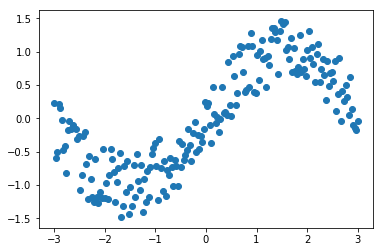

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

n_observations = 200
xs = np.linspace(-3,3,n_observations)
ys = np.sin(xs)+np.random.uniform(-0.5,0.5,n_observations)
plt.scatter(xs,ys)
plt.show()

Epoch 0: 0.06789385104084204
Epoch 20: 0.004206045479277236
Epoch 40: 0.003022893313088275
Epoch 60: 0.0022161897561446507
Epoch 80: 0.0016627961504876066
Epoch 100: 0.0012831672683046524
Epoch 120: 0.0010227402287841158
Epoch 140: 0.0008440916685727073
Epoch 160: 0.0007215389604625811
Epoch 180: 0.0006374725020308425
Epoch 200: 0.0005798060451343867
Epoch 220: 0.0005402528338541113
Epoch 240: 0.0005131243233358874
Epoch 260: 0.0004945192259311782
Epoch 280: 0.0004817620797987399
Epoch 300: 0.00047301839074568973
Epoch 320: 0.00046702654392831276
Epoch 340: 0.00046292232195672354
Epoch 360: 0.0004601123838788812
Epoch 380: 0.00045819012060295707
Epoch 400: 0.0004568767573824317
Epoch 420: 0.00045598020754347604
Epoch 440: 0.0004553697547648344
Epoch 460: 0.0004549545763837071
Epoch 480: 0.0004546731571210705
Epoch 500: 0.000454483330988964
Epoch 520: 0.00045435591597538407
Epoch 540: 0.00045427101784436196
Epoch 560: 0.0004542147721958312
Epoch 580: 0.0004541781549635382
Epoch 600: 0.0

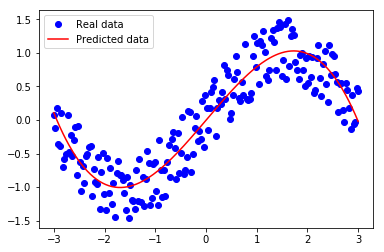

In [2]:
X = tf.placeholder(tf.float32, name='X_placeholder')
Y = tf.placeholder(tf.float32, name='Y_placeholder')

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

Y_pred = tf.add(tf.multiply(X, W), b)
W_2 = tf.Variable(tf.random_normal([1]), name='weight_1')
Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W_2), Y_pred)
W_3 = tf.Variable(tf.random_normal([1]), name='weight_2')
Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W_3), Y_pred)
sample_num = xs.shape[0]

loss = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / sample_num
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
n_samples = xs.shape[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        total_loss = 0
        for x, y in zip(xs, ys):
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y})
            total_loss += l
                
        if i%20 ==0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    W, W_2, W_3, b = sess.run([W, W_2, W_3, b])
    
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs * W + np.power(xs, 2) * W_2 + np.power(xs, 3) * W_3 + b, 'r', label='Predicted data')
plt.legend()
plt.show()